In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path='/content/drive/MyDrive/FTS_CSV/cities_by_hours.csv'
df=pd.read_csv(path)
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [ ]:
df.shape

(707875, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707875 entries, 0 to 707874
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   City        707875 non-null  object 
 1   Datetime    707875 non-null  object 
 2   PM2.5       562787 non-null  float64
 3   PM10        411138 non-null  float64
 4   NO          591243 non-null  float64
 5   NO2         590753 non-null  float64
 6   NOx         584651 non-null  float64
 7   NH3         435333 non-null  float64
 8   CO          621358 non-null  float64
 9   SO2         577502 non-null  float64
 10  O3          578667 non-null  float64
 11  C6H6        544229 non-null  float64
 12  C7H8        487268 non-null  float64
 13  C8H10       252046 non-null  float64
 14  AQI         578795 non-null  float64
 15  AQI_Bucket  578795 non-null  object 
dtypes: float64(13), object(3)
memory usage: 86.4+ MB


In [ ]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,562787.000000,411138.000000,591243.000000,590753.000000,584651.000000,435333.000000,621358.000000,577502.000000,578667.000000,544229.000000,487268.000000,252046.000000,578795.000000
mean,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,3.130537,166.413500
std,74.730496,104.224752,32.095211,29.162194,39.756669,28.831900,10.970514,19.305540,29.806379,16.456599,21.741023,7.834832,162.112729
min,0.010000,0.010000,0.010000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,8.000000
25%,26.200000,52.380000,3.840000,10.810000,10.660000,8.120000,0.420000,4.880000,13.420000,0.050000,0.370000,0.100000,79.000000
50%,46.420000,91.500000,7.960000,20.320000,20.790000,15.380000,0.800000,8.370000,26.240000,0.860000,2.590000,0.790000,116.000000
75%,79.490000,147.520000,16.150000,36.350000,37.150000,29.230000,1.370000,14.780000,47.620000,2.750000,8.410000,3.120000,208.000000
max,999.990000,1000.000000,499.990000,499.510000,498.610000,499.970000,498.570000,199.960000,497.620000,498.070000,499.400000,499.990000,3133.000000


In [ ]:
df.isnull().sum()

City               0
Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
C6H6          163646
C7H8          220607
C8H10         455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [ ]:
def NonNull(column):                          #to count non null values of each column
  NaN=df[column].isna().sum()
  total=707875                     #number of entries
  non=int(total)-int(NaN)
  per_of_null=NaN/total *100
  print(column,"-> Non NULL=",non)
  print(column,"-> Percent NULL=",round(per_of_null,2))

columns=df.columns
for column in columns:
  NonNull(column)


City -> Non NULL= 707875
City -> Percent NULL= 0.0
Datetime -> Non NULL= 707875
Datetime -> Percent NULL= 0.0
PM2.5 -> Non NULL= 562787
PM2.5 -> Percent NULL= 20.5
PM10 -> Non NULL= 411138
PM10 -> Percent NULL= 41.92
NO -> Non NULL= 591243
NO -> Percent NULL= 16.48
NO2 -> Non NULL= 590753
NO2 -> Percent NULL= 16.55
NOx -> Non NULL= 584651
NOx -> Percent NULL= 17.41
NH3 -> Non NULL= 435333
NH3 -> Percent NULL= 38.5
CO -> Non NULL= 621358
CO -> Percent NULL= 12.22
SO2 -> Non NULL= 577502
SO2 -> Percent NULL= 18.42
O3 -> Non NULL= 578667
O3 -> Percent NULL= 18.25
C6H6 -> Non NULL= 544229
C6H6 -> Percent NULL= 23.12
C7H8 -> Non NULL= 487268
C7H8 -> Percent NULL= 31.16
C8H10 -> Non NULL= 252046
C8H10 -> Percent NULL= 64.39
AQI -> Non NULL= 578795
AQI -> Percent NULL= 18.23
AQI_Bucket -> Non NULL= 578795
AQI_Bucket -> Percent NULL= 18.23


In [4]:
#64.39% of values are null in C8H10 so we drop it
df=df.drop('C8H10',axis=1)
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,NaN,NaN


In [ ]:
# Extracting year month day from each records
df['Datetime']=pd.to_datetime(df['Datetime'])
df["Year"] = df["Datetime"].dt.year
df["Month"] = df["Datetime"].dt.month
df["Day"] = df["Datetime"].dt.day
df['Time']=df['Datetime'].dt.time
df.info()

KeyboardInterrupt: ignored

In [ ]:
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,Year,Month,Day,Time
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,NaN,NaN,2015,1,1,01:00:00
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,NaN,NaN,2015,1,1,02:00:00
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,NaN,NaN,2015,1,1,03:00:00
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,NaN,NaN,2015,1,1,04:00:00
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,NaN,NaN,2015,1,1,05:00:00


In [ ]:
# AQI_Bucket yearly analysis
year_aqi_bucket=df.groupby(["Year","AQI_Bucket"])["AQI_Bucket"].count()
year_aqi_bucket= pd.DataFrame(year_aqi_bucket)
year_aqi_bucket.columns = ["AQI_Bucket Count"]
year_aqi_bucket.reset_index(inplace=True)
year_aqi_bucket

,Year,AQI_Bucket,AQI_Bucket Count
0,2015,Good,2038
1,2015,Moderate,14397
2,2015,Poor,8203
3,2015,Satisfactory,7908
4,2015,Severe,3168
5,2015,Very Poor,6988
6,2016,Good,2754
7,2016,Moderate,20613
8,2016,Poor,9153
9,2016,Satisfactory,12771


In [5]:
#replacing NaN values in columns of type float with respective mean
columns=df.columns
for name in columns:
  if name=="City" or name=="Datetime" or name=="AQI_Bucket" or name=='Time' or name=="AQI":
    continue
  else:
    df[name].fillna(df[name].mean(axis=0),inplace=True)
df.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,67.622994,119.075804,1.00,40.01,36.37,23.607959,1.00,122.07,34.798979,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,67.622994,119.075804,0.02,27.75,19.73,23.607959,0.02,85.90,34.798979,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,67.622994,119.075804,0.08,19.32,11.08,23.607959,0.08,52.83,34.798979,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,67.622994,119.075804,0.30,16.45,9.20,23.607959,0.30,39.53,153.580000,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,67.622994,119.075804,0.12,14.90,7.85,23.607959,0.12,32.63,34.798979,0.0,0.0,NaN,NaN


In [ ]:
df.isnull().sum()

City               0
Datetime           0
PM2.5              0
PM10               0
NO                 0
NO2                0
NOx                0
NH3                0
CO                 0
SO2                0
O3                 0
C6H6               0
C7H8               0
AQI           129080
AQI_Bucket    129080
Year               0
Month              0
Day                0
Time               0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Moderate        198991
Satisfactory    189434
Poor             66654
Very Poor        57455
Good             38611
Severe           27650
Name: AQI_Bucket, dtype: int64

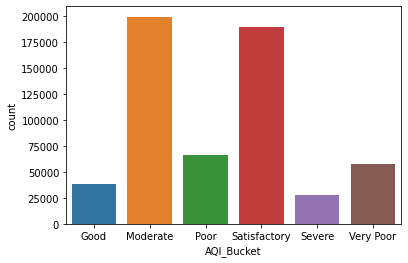

In [6]:
df['AQI_Bucket']=df['AQI_Bucket'].astype('category')


sns.countplot('AQI_Bucket',data=df)
df['AQI_Bucket'].value_counts()

In [7]:
df2=df[df['AQI'].isna()] #we'll find NaN values by ML model later and merge it with original dataset
df1=df.dropna()
df2.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015 1:00,67.622994,119.075804,1.00,40.01,36.37,23.607959,1.00,122.07,34.798979,0.0,0.0,NaN,NaN
1,Ahmedabad,1/1/2015 2:00,67.622994,119.075804,0.02,27.75,19.73,23.607959,0.02,85.90,34.798979,0.0,0.0,NaN,NaN
2,Ahmedabad,1/1/2015 3:00,67.622994,119.075804,0.08,19.32,11.08,23.607959,0.08,52.83,34.798979,0.0,0.0,NaN,NaN
3,Ahmedabad,1/1/2015 4:00,67.622994,119.075804,0.30,16.45,9.20,23.607959,0.30,39.53,153.580000,0.0,0.0,NaN,NaN
4,Ahmedabad,1/1/2015 5:00,67.622994,119.075804,0.12,14.90,7.85,23.607959,0.12,32.63,34.798979,0.0,0.0,NaN,NaN


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578795 entries, 680 to 707874
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   City        578795 non-null  object        
 1   Datetime    578795 non-null  datetime64[ns]
 2   PM2.5       578795 non-null  float64       
 3   PM10        578795 non-null  float64       
 4   NO          578795 non-null  float64       
 5   NO2         578795 non-null  float64       
 6   NOx         578795 non-null  float64       
 7   NH3         578795 non-null  float64       
 8   CO          578795 non-null  float64       
 9   SO2         578795 non-null  float64       
 10  O3          578795 non-null  float64       
 11  C6H6        578795 non-null  float64       
 12  C7H8        578795 non-null  float64       
 13  AQI         578795 non-null  float64       
 14  AQI_Bucket  578795 non-null  category      
 15  Year        578795 non-null  int64         
 16  

In [ ]:
df1.isnull().sum()

City          0
Datetime      0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
C6H6          0
C7H8          0
AQI           0
AQI_Bucket    0
Year          0
Month         0
Day           0
Time          0
dtype: int64

In [ ]:
top_cities_10=df1.groupby('City').AQI.mean().sort_values(ascending=False)[:10]
#top 10 cities of max AQI
print(top_cities_10)

City
Ahmedabad       453.542641
Delhi           260.148048
Patna           237.929606
Gurugram        223.877409
Lucknow         218.267122
Talcher         177.556503
Jorapokhar      159.990075
Brajrajnagar    151.419829
Kolkata         140.688918
Guwahati        140.246848
Name: AQI, dtype: float64


In [8]:
df1['AQI_Bucket']=df1['AQI_Bucket'].astype('category')

df1.dtypes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


City            object
Datetime        object
PM2.5          float64
PM10           float64
NO             float64
NO2            float64
NOx            float64
NH3            float64
CO             float64
SO2            float64
O3             float64
C6H6           float64
C7H8           float64
AQI            float64
AQI_Bucket    category
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


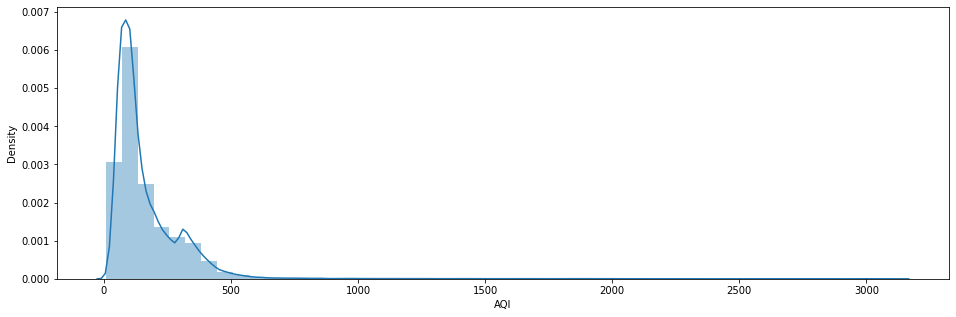

In [ ]:
plt.figure(figsize=(16,5))
sns.distplot(df1['AQI'])

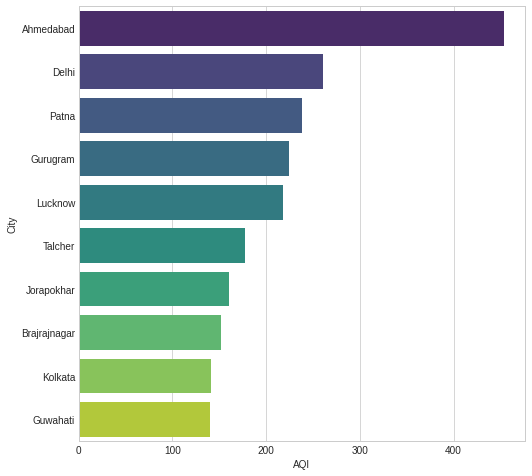

In [ ]:
x=pd.DataFrame(df1.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending = False).head(10))
x=x.reset_index('City')


plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(data= x , x='AQI', y= 'City',orient = 'h' , palette = 'viridis')

In [ ]:
numeric_data=df1.select_dtypes(include=[np.number])
numeric_data.columns
correlation=numeric_data.corr()
print(correlation['AQI'].sort_values(ascending=False),'\n')
#maximum effect on AQI is because of CO and PM2.5



AQI      1.000000
CO       0.565463
PM2.5    0.493786
NO2      0.420600
PM10     0.376091
NOx      0.374534
SO2      0.356490
NO       0.337496
C7H8     0.249579
NH3      0.111531
O3       0.088613
C6H6     0.052370
Month    0.018654
Day     -0.006269
Year    -0.163006
Name: AQI, dtype: float64 



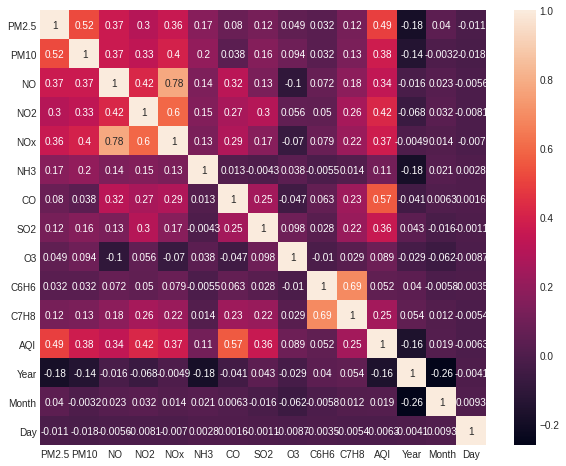

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True)

In [8]:
import datetime as dt
df1['Datetime'] = pd.to_datetime(df1['Datetime'])
df1['Datetime']=df1['Datetime'].map(dt.datetime.toordinal)
df2['Datetime'] = pd.to_datetime(df2['Datetime'])
df2['Datetime']=df2['Datetime'].map(dt.datetime.toordinal)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 578795 entries, 680 to 707874
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   City        578795 non-null  object  
 1   Datetime    578795 non-null  int64   
 2   PM2.5       578795 non-null  float64 
 3   PM10        578795 non-null  float64 
 4   NO          578795 non-null  float64 
 5   NO2         578795 non-null  float64 
 6   NOx         578795 non-null  float64 
 7   NH3         578795 non-null  float64 
 8   CO          578795 non-null  float64 
 9   SO2         578795 non-null  float64 
 10  O3          578795 non-null  float64 
 11  C6H6        578795 non-null  float64 
 12  C7H8        578795 non-null  float64 
 13  AQI         578795 non-null  float64 
 14  AQI_Bucket  578795 non-null  category
 15  Year        578795 non-null  int64   
 16  Month       578795 non-null  int64   
 17  Day         578795 non-null  int64   
 18  Time        578795 non

In [9]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
LE.fit(df2['City'])
df2['City']=LE.transform(df2['City'])
LE.fit(df1['City'])
df1['City']=LE.transform(df1['City'])
df1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
680,0,735627,80.47,119.075804,1.42,21.90,20.65,23.607959,1.42,32.26,46.71,0.0,0.0,288.0,Poor
681,0,735627,87.80,119.075804,2.03,19.87,22.22,23.607959,2.03,78.95,21.88,0.0,0.0,181.0,Moderate
682,0,735627,90.53,119.075804,1.72,20.11,22.12,23.607959,1.72,95.86,67.67,0.0,0.0,182.0,Moderate
683,0,735627,83.53,119.075804,0.75,16.35,16.48,23.607959,0.75,44.91,88.92,0.0,0.0,182.0,Moderate
684,0,735627,68.40,119.075804,0.58,13.73,12.50,23.607959,0.58,34.57,116.75,0.0,0.0,179.0,Moderate


In [11]:
X=df1[['City','Datetime','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8']]
Y=df1['AQI']

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
new_X=scaler.transform(X)
new_X

array([[0.        , 0.01394422, 0.08046161, ..., 0.0938486 , 0.        ,
        0.        ],
       [0.        , 0.01394422, 0.08779176, ..., 0.04395008, 0.        ,
        0.        ],
       [0.        , 0.01394422, 0.09052181, ..., 0.13596994, 0.        ,
        0.        ],
       ...,
       [1.        , 0.99950199, 0.03599072, ..., 0.0525311 , 0.00619912,
        0.01734266],
       [1.        , 0.99950199, 0.01574031, ..., 0.03177187, 0.00619912,
        0.01734266],
       [1.        , 1.        , 0.0149903 , ..., 0.03424368, 0.00619912,
        0.01734266]])

In [14]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(new_X,Y,test_size=0.2)


         


In [ ]:
#By removing outliers using Zscore or IQR there is a lot of loss of data so we use Local Outlier Factor algorithm
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor()
ypred = lof.fit_predict(x_train)
mask=ypred !=-1

In [ ]:
x_train,y_train=x_train[mask],y_train[mask]

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred1=lr.predict(x_test)
from sklearn.metrics import r2_score
print("accuracy test",r2_score(y_test,y_pred1))
y_p=lr.predict(x_train)
print("accuracy train ",r2_score(y_train,y_p))

accuracy test 0.57823708325327
accuracy train  0.5928268205368876


In [10]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score


In [11]:
X=df1[['City','Datetime','PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8','AQI']]
Y=df1['AQI_Bucket']

In [12]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3)
x_train.head()

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,AQI
405748,15,736834,57.300000,456.920000,5.940000,16.530000,19.770000,22.920000,0.820000,11.240000,128.210000,1.400000,0.300000,179.0
106610,4,735752,10.300000,119.075804,0.400000,6.170000,1.700000,2.380000,2.183539,3.860000,83.140000,5.710000,8.660927,100.0
431557,16,736742,67.622994,119.075804,17.421755,28.885157,32.287565,23.607959,2.183539,14.038307,34.798979,3.087595,8.660927,267.0
395972,14,737539,27.750000,39.420000,4.910000,23.410000,15.840000,13.610000,0.300000,2.670000,26.810000,0.870000,2.530000,59.0
97872,3,737396,82.210000,142.490000,7.550000,8.700000,16.070000,5.530000,0.310000,10.500000,22.690000,2.130000,1.900000,181.0


In [19]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = GridSearchCV(svm.SVC(gamma='auto'), {
    'C': [1],
    'kernel': ['linear']
}, cv=5, return_train_score=False)
clf.fit(x_train,y_train)
y_svm_1=clf.predict(x_test)
accuracy_svm=accuracy_score(y_test,y_svm_1)
print("accuracy -> svm: ",accuracy_svm)

In [14]:
from sklearn.linear_model import LogisticRegression
classifier_1=LogisticRegression(random_state=0,max_iter=500)
classifier_1.fit(x_train,y_train)
y_pred=classifier_1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8726380594221345
